In [2]:
%matplotlib inline
from __future__ import division
import numpy as np

import os
import sys
import datetime
from subprocess import call
import subprocess
import glob
import djPyi2 as DJ
import pandas as pd
pd.options.mode.chained_assignment = None
import csv
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import copy 
import pybedtools as pbt
import ciepy
import cardipspy as cpy
import networkx as nx
from djPyi2 import mpltools
from mpl_toolkits.axes_grid1 import  make_axes_locatable
import matplotlib.patches as patches
from djPyi2 import Common as CM
import matplotlib.image as mpimg

import numpy as np
import matplotlib.cm as cm
from scipy.ndimage.filters import gaussian_filter
import matplotlib.patches as mpatch

import matplotlib.transforms as mtransforms

In [2]:
from matplotlib.ticker import FuncFormatter
import matplotlib.ticker as mtick

In [3]:
dy_name = 'Figures'

private_out = os.path.join(DJ.root, 'private_output', dy_name)
if not os.path.exists(private_out):
    cpy.makedir(private_out)

In [219]:

def add_bins(df, bins, col = 'log10_SVLEN', name_suff = 'bin_log10_SVLEN', 
            cap_thresh = 4, round_bins = False):
    if round_bins:
        bins = [round(x, 1) for x in bins]
    df[name_suff] = pd.cut(df[col], bins , labels= bins[1:])
    df[name_suff] = df[name_suff].astype(float)
    df["{}_capped".format(name_suff)] = df[name_suff]
    inds = df[df[name_suff] > cap_thresh].index.tolist()
    df.loc[inds, "{}_capped".format(name_suff)] = cap_thresh
    return df

In [3]:
rr_filt = pd.read_pickle('/frazer01/projects/hipsci/analysis/i2QTL-sv-analysis/private_output/Figures/figure_1_input/rr_filt.pkl')

In [31]:
rr_filt_plot = rr_filt[rr_filt.bin_log10_SVLEN.isnull() == False]
order = sorted(rr_filt_plot.bin_log10_SVLEN.unique())

In [181]:
rr_filt_plot['log10_NMODE_AF_unrel'] = np.log10(rr_filt.NMODE_AF_unrel)

/frazer01/home/djakubosky/software/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':


In [268]:
indel_str_rr_summary = pd.read_pickle('/frazer01/projects/hipsci/analysis/i2QTL-sv-analysis/private_output/str_indel_overlap/indel_str_rr_summary.pkl')

In [275]:
indel_str_comp = pd.read_pickle('/frazer01/projects/hipsci/analysis/i2QTL-sv-analysis/private_output/str_indel_overlap/indel_str_comp.pkl')

In [33]:
order = sorted(rr_filt_plot.bin_log10_SVLEN.unique())

In [37]:
# lengths and nmodes
rr_filt_plot =  rr_filt[(rr_filt.bin_log10_SVLEN.isnull() == False) & (rr_filt.final_set) & (rr_filt.NMODE_AF_unrel > 0)]

In [220]:
bins = [0, 0.01, 0.05, 0.1, 0.25, 0.5, 1]

In [221]:
rr_filt_plot = add_bins(rr_filt_plot, bins, col = 'NMODE_AF_unrel', name_suff = 'bin_NMODE_AF_unrel', round_bins=False)

str_rr_in_regions = indel_str_comp.groupby(('log_size_bins', 'category')).RR_STR.describe()['mean'].to_frame('Mean_RR').reset_index()

str_rr_in_regions['category'] = 'Genotyped STR Region (STR)'

indel_str_rr_summary['category']= indel_str_rr_summary['category'].apply(lambda x: "{} (indel)".format(x))
# indel plot 
for_plot = pd.concat([str_rr_in_regions, indel_str_rr_summary])

In [271]:
def get_tls_list(ax, axis = 'x', type_out = float):
    if axis == 'x':
        out = map(type_out, [t.get_text() for t in ax.get_xticklabels()])
        return out
    
    if axis == 'y':
        out = map(type_out, [t.get_text() for t in ax.get_yticklabels()])
        return out

# Plot

In [32]:
color_pal_svtypes_all = pd.read_pickle('/frazer01/projects/hipsci/analysis/i2QTL-sv-analysis/private_output/Figures/color_pal_svtypes_all.pkl').to_dict()

pallete_variant_callers = pd.read_pickle('/frazer01/projects/hipsci/analysis/i2QTL-sv-analysis/private_output/Figures/pallete_variant_callers.pkl').to_dict()

In [1]:
mpl.gridspec.rcParams['legend.handlelength'] = 1
mpl.gridspec.rcParams['legend.borderpad']
mpl.gridspec.rcParams['legend.handlelength'] = 1
mpl.gridspec.rcParams['legend.handletextpad'] = 0.2
mpl.gridspec.rcParams['legend.columnspacing'] = 0.5
mpl.gridspec.rcParams['legend.labelspacing'] = 0.3
mpl.gridspec.rcParams['axes.labelpad'] = 1
mpl.gridspec.rcParams['axes.labelpad'] = 1
mpl.gridspec.rcParams['ytick.major.pad'] = 1
mpl.gridspec.rcParams['xtick.major.pad'] = 1
mpl.gridspec.rcParams['axes.titlesize'] = 10
mpl.gridspec.rcParams['axes.labelsize'] = 8
mpl.gridspec.rcParams['ytick.labelsize'] = 6
mpl.gridspec.rcParams['xtick.labelsize'] = 6
mpl.gridspec.rcParams['axes.labelweight'] = 'bold'
mpl.gridspec.rcParams['grid.linewidth'] = 0.5
mpl.gridspec.rcParams['font.size'] = 7
mpl.rcParams['axes.autolimit_mode'] = 'round_numbers'
mpl.rcParams['axes.xmargin'] = 0
mpl.rcParams['axes.ymargin'] = 0

In [323]:
def buffer_tick_lims(t, f = 0.1):
    max_t = max(t)
    min_t = min(t) 
    d  = max_t - min_t
    p = d * f
    b_min = min_t - p
    b_max =  max_t + p
    return b_min, b_max

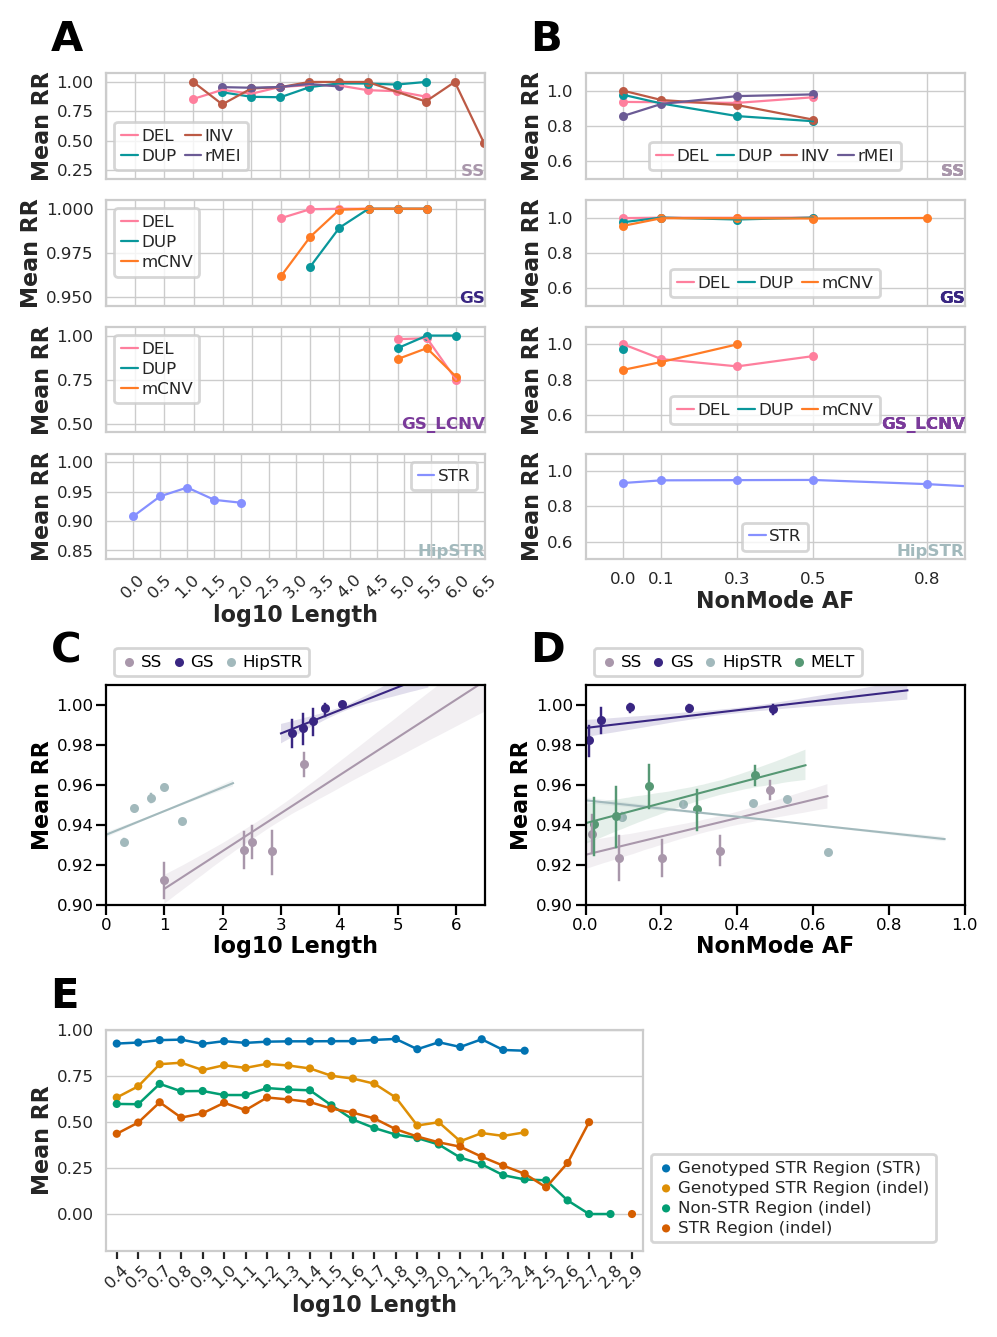

In [388]:
fig =plt.figure(figsize=(5,6.5), dpi = 200)

gs = mpl.gridspec.GridSpec(6, 2, 
                           figure =fig,
                           width_ratios=[1, 1], height_ratios = [1,1,1,1,8,8]
                           ,wspace = 0.5, hspace=1)

subgrid1 = mpl.gridspec.GridSpecFromSubplotSpec(4,1, subplot_spec=gs[0:4,0], wspace=0,
                                               hspace= 0.2)
subgrid2 = mpl.gridspec.GridSpecFromSubplotSpec(4,1, subplot_spec=gs[0:4,1], wspace=0,
                                               hspace= 0.2)
                                               
subgrid3 = mpl.gridspec.GridSpecFromSubplotSpec(1,2, subplot_spec=gs[5,:], wspace=0,
                                               hspace= 0, width_ratios = [1, 0.6])
 
count = 0
# seaborn regplot can evenly bin things, but won't natively connect the dots
# seaborn pointplot can do same thing, but without capability to do regression/results
# draw with regplot, retrieve and connect 
ax_inv = fig.add_subplot(gs[4,0]) # just an ax to draw to and retrieve x/y for connecting lines

bins_len = np.arange(0, 7, 0.5)
bins_len = map(lambda x: round(x, 1), bins_len)
axes = []
ticks = [[0.25, 0.5, 0.75, 1.0], [0.95, 0.975, 1.0], [0.5, 0.75, 1.0], [0.85, 0.9, 0.95, 1.0]]
with sns.axes_style('whitegrid'):
    for i, c in enumerate(['SS', 'GS', 'GS_LCNV', 'HipSTR']):


        ax = fig.add_subplot(subgrid1[count])
        axes.append(ax)
        ax.grid(zorder = 0)

        ax.tick_params(axis='both', grid_linewidth = 0.5)
        count +=1

        for svt, df in rr_filt_plot[rr_filt_plot.CALLER == c].groupby('SVTYPE'):

            if svt in ['DUP', 'DEL', 'mCNV', 'rMEI', 'INV', 'STR']:
                if df.shape[0] > 0:
    #                 print 'yes'

                    with mpl.rc_context({"lines.linewidth": 0.8}):
                        sns.regplot(x = 'log10_SVLEN', y = 'RR',
                              data = df, fit_reg = False, x_bins = bins_len, truncate = True, 
                              ci = None, n_boot = 1000, color= color_pal_svtypes_all[svt], ax = ax,
                                   scatter_kws  = {'s': 5}, line_kws = {'lw': 0.8})

                        ax_inv = sns.regplot(x = 'log10_SVLEN', y = 'RR',
                                             fit_reg = False,
                              data = df, x_bins = bins_len, truncate = True,
                              ci = 'sd', n_boot = 1000, color = color_pal_svtypes_all[svt], ax = ax_inv)

                    lines = ax_inv.get_lines()
                    x = [np.mean(l.get_xdata()) for l in lines]
                    y = [np.mean(l.get_ydata()) for l in lines]
                    ax_inv.clear()
                    ax.plot(x, y, color= color_pal_svtypes_all[svt], lw = 0.8, label = svt)
                    ax.tick_params(axis = 'x', labelrotation = 45)
                    ax.set_xticks(bins_len)
        ncol = 1
        if count == 1:
            ncol = 2
        ax.legend(loc = 'best', fontsize = 6, ncol = ncol)
        ax.text(1,0, c, ha = 'right', transform = ax.transAxes, va = 'bottom', fontsize = 6,
               color= pallete_variant_callers[c], weight = 'bold') 
        ax.set_ylabel('Mean RR')
        ax.set_yticks(ticks[i])
        ax.set_ylim(buffer_tick_lims(ticks[i]))
        
        if count != 4:
            ax.set_xticklabels([])
            ax.set_xlabel('')
        else:
            ax.set_xlabel('log10 Length')

    ax1 = axes[0]

    ax_inv.clear()
    axes = []
    count = 0
    bins_maf = [0, 0.1, 0.3, 0.5, 0.8, 1]
    for c in ['SS', 'GS', 'GS_LCNV', 'HipSTR']:


        ax = fig.add_subplot(subgrid2[count])
        axes.append(ax)
        ax.grid(zorder = 0)

        ax.tick_params(axis='both', grid_linewidth = 0.5)
        count +=1

        for svt, df in rr_filt_plot[rr_filt_plot.CALLER == c].groupby('SVTYPE'):

            if svt in ['DUP', 'DEL', 'mCNV', 'rMEI', 'INV', 'STR']:
                if df.shape[0] > 0:
    #                 print 'yes'

                    with mpl.rc_context({"lines.linewidth": 0.8}):
                        sns.regplot(x = 'NMODE_AF_unrel', y = 'RR', 
                              data = df, fit_reg = False, x_bins = bins_maf, truncate = True,
                              ci = 0, n_boot = 1000, color= color_pal_svtypes_all[svt], ax = ax, 
                                    line_kws ={'lw':0.8},
                                   scatter_kws  = {'s': 5})

                        ax_inv = sns.regplot(x = 'NMODE_AF_unrel', y = 'RR',
                                             fit_reg = False,
                              data = df, x_bins = bins_maf, truncate = True,
                              ci = 'sd', n_boot = 1000, color = color_pal_svtypes_all[svt], ax = ax_inv)

                    lines = ax_inv.get_lines()
                    x = [np.mean(l.get_xdata()) for l in lines]
                    y = [np.mean(l.get_ydata()) for l in lines]
                    ax_inv.clear()
                    ax.plot(x, y, color= color_pal_svtypes_all[svt], lw = 0.8, label = svt)
            ncol = 1
            if count == 1:
                ncol = 2
            ax.legend(loc = 'lower center', fontsize = 6, ncol = 4)
            ax.xaxis.grid(zorder = 0)
    #         ax.legend().set_visible(False)
            ax.set_xticks(bins_maf[:-1])
            ax.set_xlim(-0.1, 0.9)
            ax.set_ylim(0.5, 1.1)
            ax.set_yticks([0.6, 0.8, 1.0])
    #         ax.set_xlim(0, 6.4)
    #         ax.xaxis.set_major_locator(mtick.MultipleLocator(0.1))()
            ax.text(1,0, c, ha = 'right', transform = ax.transAxes, va = 'bottom', fontsize = 6, 
                    color= pallete_variant_callers[c], weight = 'bold')
            ax.set(xlabel = 'NonMode AF', ylabel = 'Mean RR')


            if count != 4:
                ax.set_xticklabels([])
                ax.set_xlabel('')


    ax2 = axes[0]
    ax_inv.remove()


ax3 = fig.add_subplot(gs[4, 0])
with mpl.rc_context({"lines.linewidth": 0.5}):
    for c in ['SS', 'GS', 'HipSTR']:
        tdf =  rr_filt[(rr_filt.NMODE_AF_unrel > 0) & 
                       (rr_filt.CALLER==c) & (rr_filt.final_set)]
        ax = sns.regplot(x = 'log10_SVLEN', y = 'RR', y_partial='NMODE_AF_unrel',
                    data = tdf,
                         fit_reg = True, x_bins = 5, ax = ax3,
                         color = pallete_variant_callers[c], label = c, truncate = True,
                         scatter_kws  = {'s': 5})
ax3.legend(bbox_to_anchor = (0,1), ncol = 4, fontsize = 6, loc ='lower left')
ax3.set_ylim(0.9, 1.01)
ax3.set_xlim(0,6.5)
ax3.set_xlabel('log10 Length')
ax3.set_ylabel('Mean RR')

ax4 = fig.add_subplot(gs[4, 1])
with mpl.rc_context({"lines.linewidth": 0.5}):
    for c in ['SS', 'GS', 'HipSTR', 'MELT']:
        tdf =  rr_filt[(rr_filt.NMODE_AF_unrel > 0) & 
                       (rr_filt.CALLER==c) & (rr_filt.final_set)]
        ax = sns.regplot(x = 'NMODE_AF_unrel', y = 'RR', y_partial='log10_SVLEN',
                    data = tdf,
                         fit_reg = True, x_bins = 5, ax = ax4,
                         color = pallete_variant_callers[c], label = c, truncate = True,
                         scatter_kws  = {'s': 5})
ax4.legend(bbox_to_anchor = (0,1), ncol = 4, fontsize = 6, loc ='lower left')
ax4.set_xlabel('NonMode AF')
ax4.set_ylabel('Mean RR')
ax4.set_ylim(0.9, 1.01)
with sns.axes_style('whitegrid'):
    ax5 = fig.add_subplot(subgrid3[0])
    with mpl.rc_context({"lines.linewidth": 0.5}):
        sns.pointplot(x = 'log_size_bins', y = 'Mean_RR', hue ='category',
                  data = for_plot, ax = ax5, palette = 'colorblind')
    ax5.tick_params(axis = 'x', labelrotation = 45, length = 3, bottom = True)
    xtls = get_tls_list(ax5, axis='x')
    # mpltools.format_easy_read_log(xtls, log10=True)
    ax5.set(xlabel='log10 Length', ylabel='Mean RR')
    ax5.legend(bbox_to_anchor= (1,0), loc= 'lower left', fontsize = 6)



gs.tight_layout(fig)
labels = ['A', 'B', 'C', 'D', 'E']
fig.canvas.draw()

for i, a in enumerate([ax1, ax2, ax3, ax4, ax5]):
    mpltools.label_offset_axes(a, fig, labels[i], x = -20, y = 8, )

out_fn = private_out + '/SupFig_RR_Caller_Length_AF'
fig.savefig(out_fn, bbox_inches='tight', dpi = 300)